## PortFolio 5

###  INTRODUCTION

The motivation of this work was to predict whether or not a new transaction (unseen data) will be fraudulent. In undertaking this work, the data were trained in four different scenario:  Firstly, reducing the data to lower dimension before training, secondly; training the data as it is. Thirdly, applying over-sampling technique on the dataset and lastly under-sampling the dataset. Five models were used to train the data.

### Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
#plt.style.use('ggplot')
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Initial viewing of the data shows, it has 284807 observations and 31 input variables.  The total count values in all the rows are 8829017 with no missing values.  The data values are all numeric except the class which is integer.

In [2]:
np.sum(df.count())

8829017

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.isnull().values.sum()# Training set

0

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


The Class variable consist of category 0 and 1. The 0 depicts normal and 1 depicts fraud. The data set is grossly imbalanced with the fraud transaction of 0.17% of the dataset and normal transaction 99.8%.   This can also be seen in the visual below, the fraud class is almost unseen, lying on the x axis.

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
fraction = len(fraud)/float(len(df))
normal_fraction = len(normal)/float(len(df))
print('Fraud ratio:',fraction)
print('Non_Fraud ratio:', normal_fraction)
print('fraud cases :{}'.format(len(fraud)))
print('normal cases :{}'.format(len(normal)))

Fraud ratio: 0.001727485630620034
Non_Fraud ratio: 0.9982725143693799
fraud cases :492
normal cases :284315


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
#plt.style.use('ggplot')

#### Data Visualization

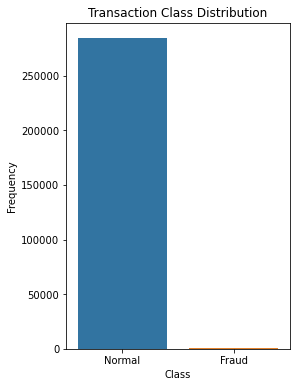

In [10]:
#pd.value_counts(df['Class']).plot.bar()
plt.rcParams['figure.figsize'] = (4.0,6.0)
g = sns.countplot(df['Class'])
plt.title('Transaction Class Distribution')
g.set_xticklabels(['Normal','Fraud'])
plt.ylabel('Frequency')
plt.show()

Pair Plot using scatter matrix

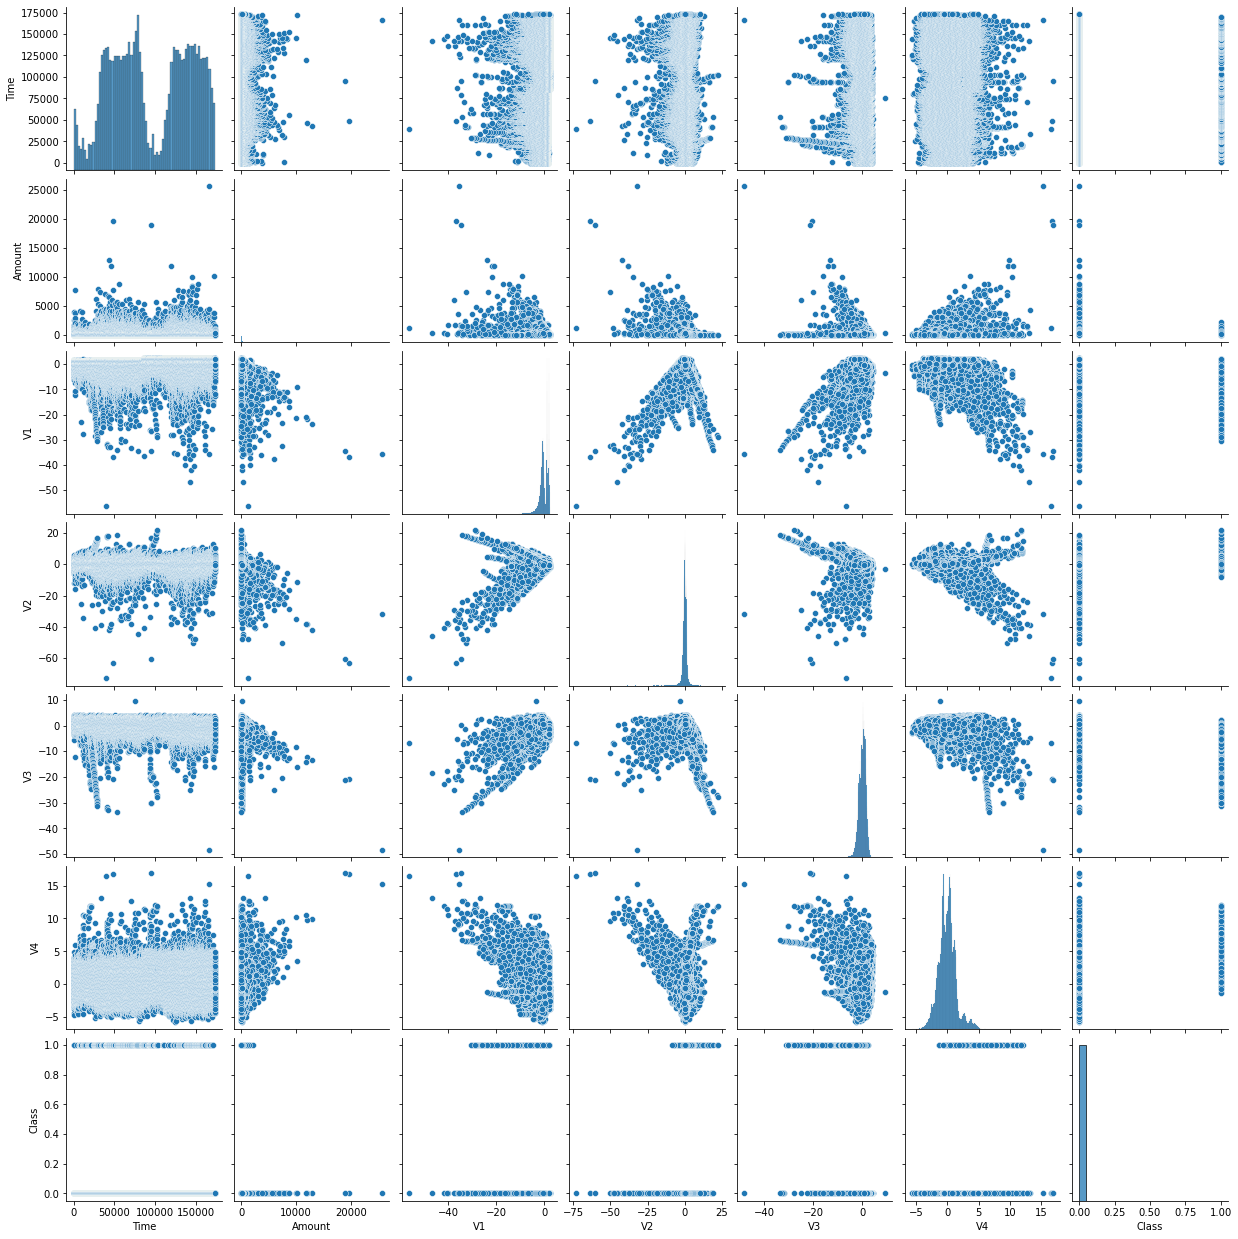

In [11]:
sns.pairplot(df[['Time','Amount','V1','V2','V3','V4','Class']])

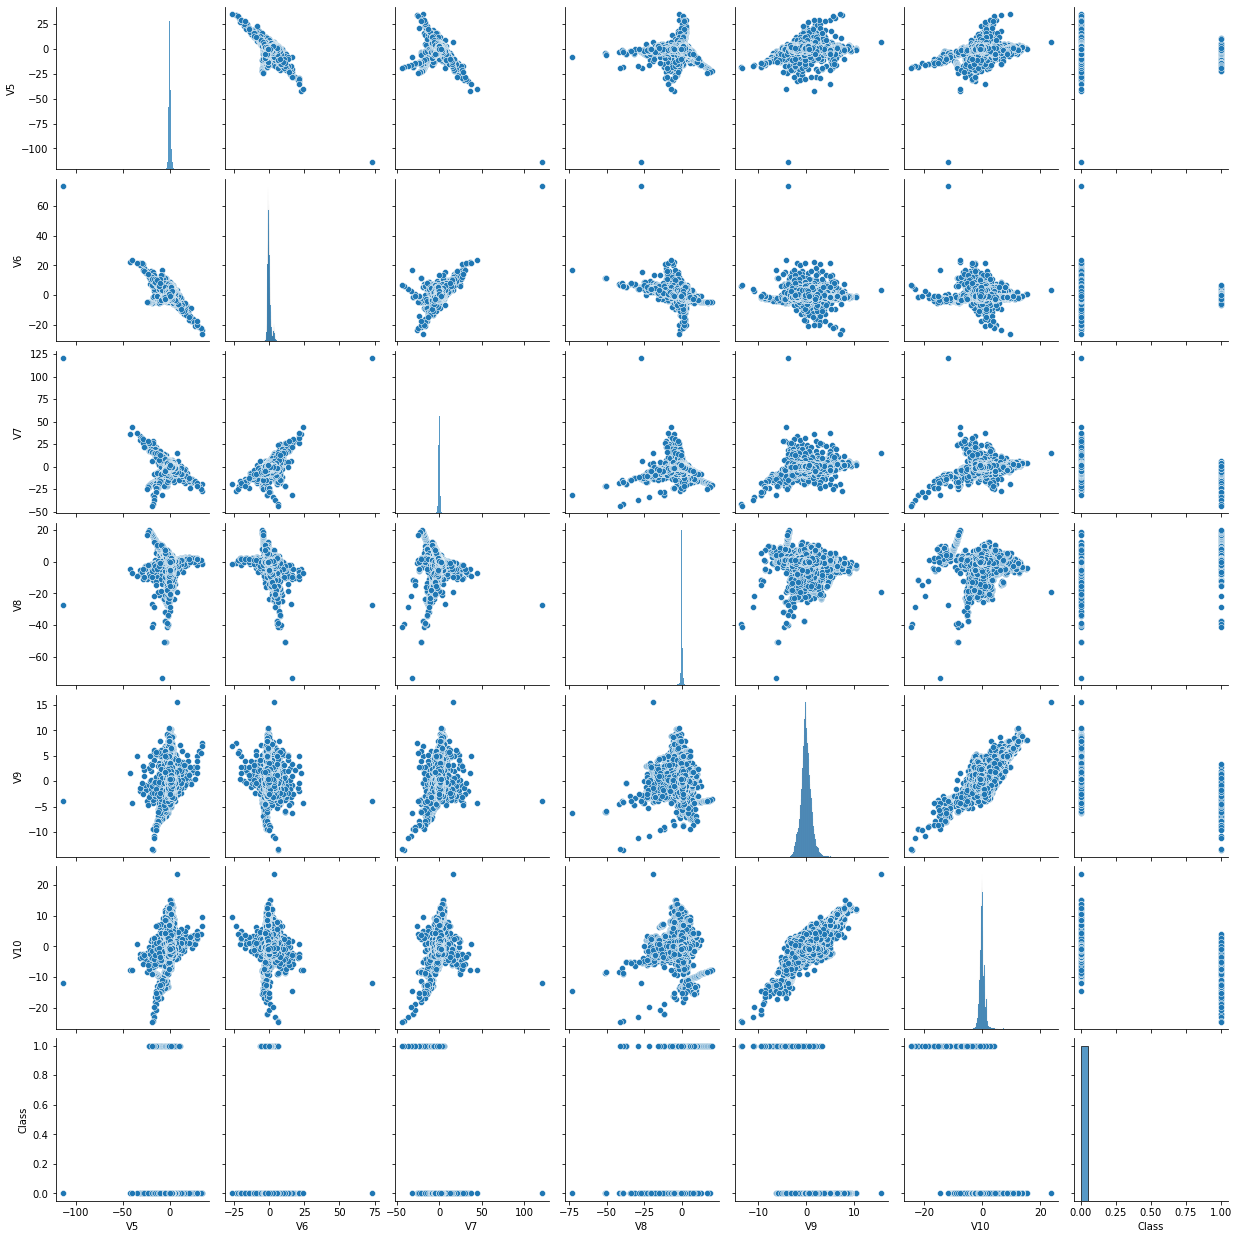

In [12]:
sns.pairplot(df[['V5','V6','V7','V8','V9','V10','Class']])

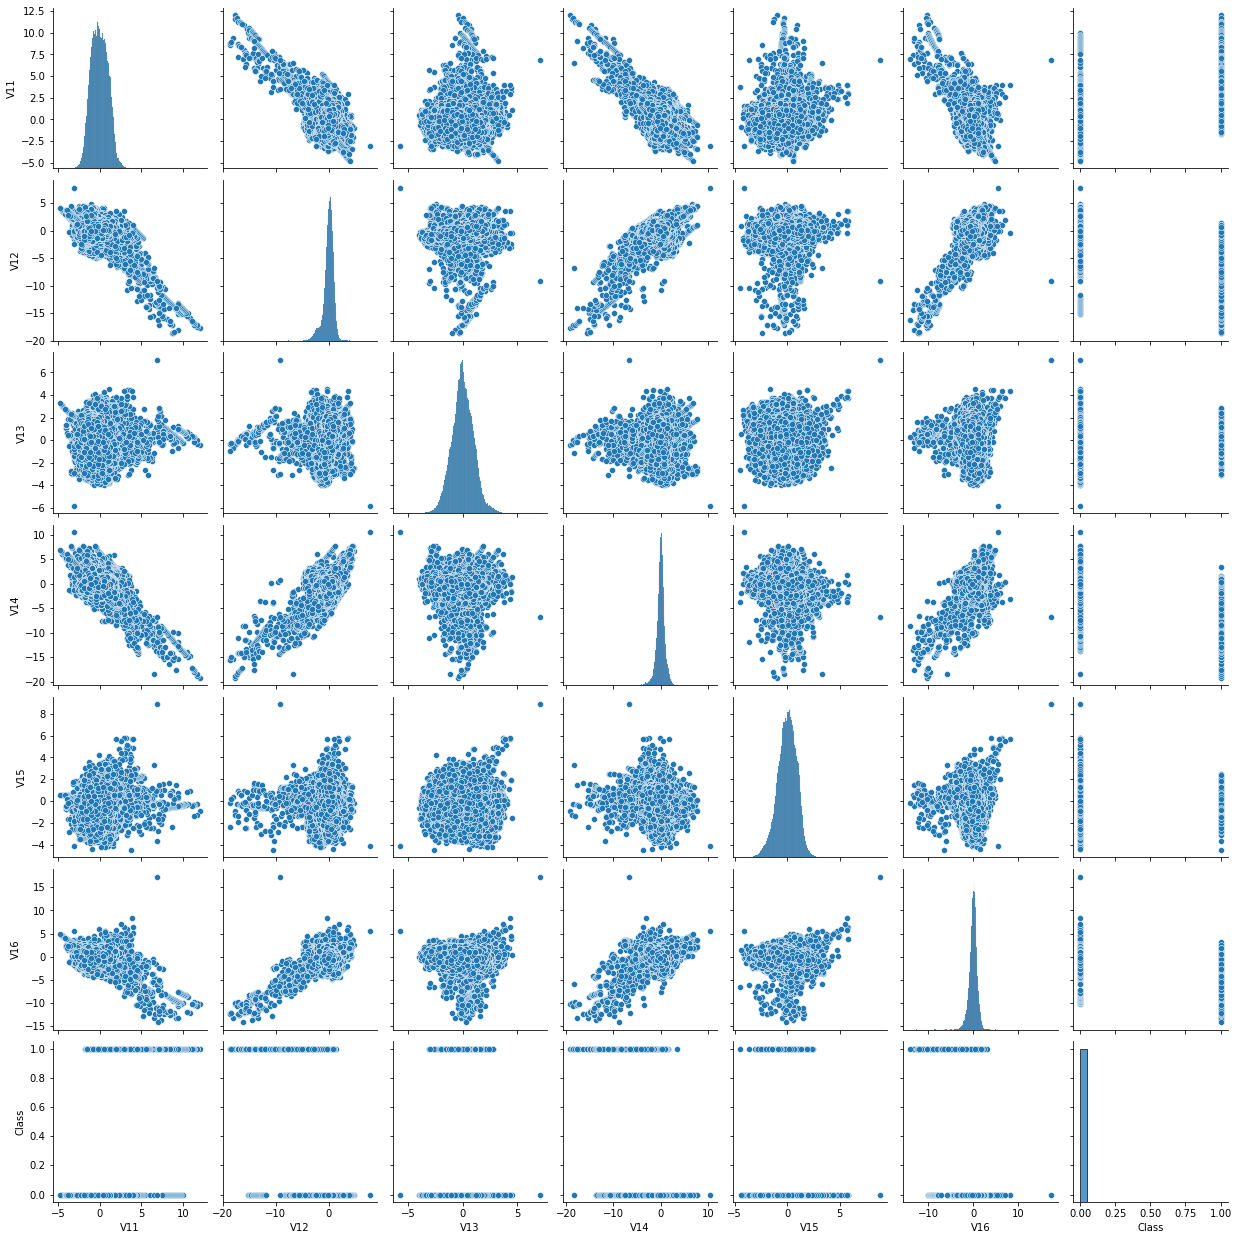

In [13]:
sns.pairplot(df[['V11','V12','V13','V14','V15','V16','Class']])

The scatter plots of some of the variables shows that some variables are co-related like V9 and V10, V11 and V12 and few others variables. Time and amount doesn't seem to be co-relalated with any variable.

#### SUMMARY STATISTICS

In [6]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [7]:
normal.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


the normal transactions average value amount is 88.29 while the average fraud amount is 122.21, this is higher than the normal amount. This shows that the average amount involve in fraud in high compare to normal.  The maximum amount shows that the total amount of fraud compared to normal transaction is less.
We can also observed that the values are in different scale, so the datasets needs to be scaled.

### Data Preprocessing

####  Data Scaling  - Using Minmaxscaler 

This was necessary to have all the data values in the same range and for the ease of training the  model

In [8]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import scale
# transform testing dataabs
scaled = MinMaxScaler().fit_transform(df)
norm=pd.DataFrame(scaled,columns=['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
      'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
      'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Class'])
norm
#scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


Create the dataset into dependent and independent features

In [9]:
X = norm.iloc[:,:-1]
y = norm.iloc[:,-1]
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


####  Features Selection and dimensionality reduction

The algorithm shows the important features that are relevant, this is helpful for dimensionality reduction.   five features are identified to be most relevant, and after the ninth features, the less relevant the features became.  I tried to undertake dimensionality reduction with principal components analysis, all the model performance were very poor - below 50%. Perhaps due to the fact that the data have previously transformed.  On that note I rejected the result.

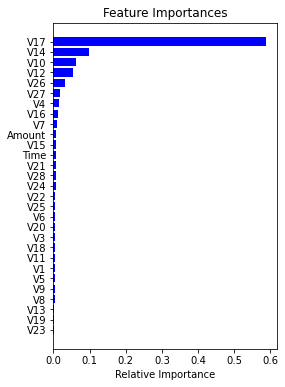

In [19]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
#df=pd.get_dummies(df)
model.fit(X,y)#,train.Item_Outlet_Sales)
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-29:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

To ascertain how the model has perform after training the data, some data will be hold back so that the algorithm will not get to see this data, this is an independent way of knowing how well the model has perform.  The data set was split into two, 70% for training and 30% that will be hold back as a validation dataset. The splitting was done before sampling the dataset to avoid data contamination or leakage.
An occurrence where common information is shared between the training data and the testing data. Sampling the dataset will make all the dataset to be shuffled, therefore, exposing the dataset.   https://dl.acm.org/doi/pdf/10.1145/2382577.2382579, https://www.youtube.com/watch?v=n9jz7G68pVg.

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=2)
Xtrain.shape, ytrain.shape,Xtest.shape,ytest.shape

((199364, 30), (199364,), (85443, 30), (85443,))

### Build the model and train data without sampling

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
DTClassifier = clf.fit(Xtrain,ytrain)

In [12]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
LogClassifier = Logreg.fit(Xtrain, ytrain)

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
RFClassiffier = clf.fit(Xtrain,ytrain)

In [14]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
NBClassifier = GNB.fit(Xtrain, ytrain)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
Kclassifier = KNeighborsClassifier(n_neighbors=5)
Kclassifier.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [16]:
nP0=DTClassifier.predict(Xtest)
nP1=LogClassifier.predict(Xtest)
nP2=RFClassiffier.predict(Xtest)
nP3=NBClassifier.predict(Xtest)
nP4=Kclassifier.predict(Xtest)

Prediction of unseen data

In [17]:
print('Decision Tree:',nP0)
print('Logistic Regresion:',nP1)
print('Random Forest:',nP2)
print('Naive Baye:', nP3)
print('K Neighbor:',nP4)

Decision Tree: [0. 0. 0. ... 0. 0. 0.]
Logistic Regresion: [0. 0. 0. ... 0. 0. 0.]
Random Forest: [0. 0. 0. ... 0. 0. 0.]
Naive Baye: [0. 0. 0. ... 0. 0. 0.]
K Neighbor: [0. 0. 0. ... 0. 0. 0.]


Obtaining accuracy of the model

In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix # For creation of the confusion matrix
from sklearn.metrics import classification_report # For creation of precision, recall and f1-measures
from sklearn.metrics import accuracy_score # For help in comparing data given using accuracy score vs confusion matrix
from sklearn.model_selection import cross_val_score
print('Decision Tree accuracy:', metrics.accuracy_score(ytest,nP0))
print('Logistic Regresion accuracy:',metrics.accuracy_score(ytest, nP1))
print('Random Forest accuracy:',metrics.accuracy_score(ytest,nP2))
print('Naive Baye accuracy:',metrics.accuracy_score(ytest, nP3))
print('KNeighbour accuracy:',metrics.accuracy_score(ytest, nP4))

Decision Tree accuracy: 0.9993562960102056
Logistic Regresion accuracy: 0.9992275552122467
Random Forest accuracy: 0.9996254813150287
Naive Baye accuracy: 0.9778448790421684
KNeighbour accuracy: 0.9996371850239341


Training the dataset as it is, presents KNeighbour with the highest accuracy score. Looking at the confusion matrix below, 85303 out of 85309 were predicted normal transactions and 109 out of 134 fraud cases were detected with 6 false positives. The classification report with regards to fraud cases shows high scores for precision 95%, recall 81% and F1-scores 88%, this looks good and all scores for normal prediction is 100%.

In [19]:
print('Kneighbor:')
print(confusion_matrix(ytest,nP4))
print(accuracy_score(ytest,nP4))
print(classification_report(ytest,nP4))

Kneighbor:
[[85303     6]
 [   25   109]]
0.9996371850239341
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85309
         1.0       0.95      0.81      0.88       134

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



### Balancing the dataset - using Random Oversampling
The imbalanced nature of the data set will lead to bias during the training of the model, the model will tend to learn from higher samples compare to lower sample.  Bias will in turn increase true -negatives and false-positives rates. To overcome this in the model, the dataset was balance to approximately contain equal number of samples in all the classes.  In this work both over-sampling and under-sampling will be used to compare results.  And it was only the training set split that was used for sampling. (The Effect of Oversampling and Under sampling on Classifying Imbalanced Text Datasets -https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.101.5878&rep=rep1&type=pdf).
(An Empirical Study of Oversampling and Under sampling for Instance Selection Methods on Imbalance Datasets- https://link.springer.com/content/pdf/10.1007%2F978-3-642-41822-8_33.pdf).

In [20]:
### RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
#os =  RandomOverSampler(sampling_strategy=0.5)
#X_test, y_testT = (X, y)
os =  RandomOverSampler()
X_train, y_train = os.fit_sample(Xtrain,ytrain) # shuffle the dataset a
X_train.shape,y_train.shape

((398012, 30), (398012,))

###  Building the models and training the data

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
DTClassifier = clf.fit(X_train,y_train)

In [22]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
LogClassifier = Logreg.fit(X_train, y_train)

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
RFClassiffier = clf.fit(X_train,y_train)

In [24]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
NBClassifier = GNB.fit(X_train, y_train)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
Kclassifier = KNeighborsClassifier(n_neighbors=5)
Kclassifier.fit(X_train, y_train)

KNeighborsClassifier()

Predictions by all models using unseen data

In [26]:
P0=DTClassifier.predict(Xtest)
P1=LogClassifier.predict(Xtest)
P2=RFClassiffier.predict(Xtest)
P3=NBClassifier.predict(Xtest)
P4=Kclassifier.predict(Xtest)

In [27]:
print('Decision Tree:', P0)
print('Logistic Regresion:',P1)
print('Random Forest:',P2)
print('Naive Baye:', P3)
print('K Neighbor:', P4)

Decision Tree: [0. 0. 0. ... 0. 0. 0.]
Logistic Regresion: [0. 0. 0. ... 0. 0. 0.]
Random Forest: [0. 0. 0. ... 0. 0. 0.]
Naive Baye: [0. 0. 0. ... 0. 0. 0.]
K Neighbor: [0. 0. 0. ... 0. 0. 0.]


 Accuracy of the models

In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix # For creation of the confusion matrix
from sklearn.metrics import classification_report # For creation of precision, recall and f1-measures
from sklearn.metrics import accuracy_score # For help in comparing data given using accuracy score vs confusion matrix
from sklearn.model_selection import cross_val_score
print('Decision Tree accuracy:', metrics.accuracy_score(ytest, P0))
print('Logistic Regresion accuracy:',metrics.accuracy_score(ytest,P1))
print('Random Forest accuracy:',metrics.accuracy_score(ytest,P2))
print('Naive Baye accuracy:',metrics.accuracy_score(ytest, P3))
print('KNeighbour accuracy:',metrics.accuracy_score(ytest, P4))

Decision Tree accuracy: 0.999133925541004
Logistic Regresion accuracy: 0.9786056201210164
Random Forest accuracy: 0.999602073897218
Naive Baye accuracy: 0.973970951394497
KNeighbour accuracy: 0.9992626663389628


Random Forest is presented with the highest scores. The confusion matrix below shows 85301 out of 85309 were predicted as normal transactions while 108 out of 134 were predicted as fraud cases with 8 false positives. The classification report scores are all quite high too.

In [29]:
print('RForest:')
print(confusion_matrix(ytest,P2))
print(accuracy_score(ytest,P2))
print(classification_report(ytest,P2))

RForest:
[[85301     8]
 [   26   108]]
0.999602073897218
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85309
         1.0       0.93      0.81      0.86       134

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### Using Undersampling technique

In [30]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#instantiating the random undersampler
us = RandomUnderSampler() 
# resampling X, y
train_X, train_y = us.fit_resample(Xtrain, ytrain)
# new class distribution

train_X.shape, train_y.shape

((716, 30), (716,))

Model Training

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
DTClassifier = clf.fit(train_X, train_y)

In [32]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
LogClassifier = Logreg.fit(train_X, train_y)

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
RFClassiffier = clf.fit(train_X, train_y)

In [34]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
NBClassifier = GNB.fit(train_X, train_y)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
Kclassifier = KNeighborsClassifier(n_neighbors=5)
Kclassifier.fit(train_X, train_y)

KNeighborsClassifier()

In [36]:
UP0=DTClassifier.predict(Xtest)
UP1=LogClassifier.predict(Xtest)
UP2=RFClassiffier.predict(Xtest)
UP3=NBClassifier.predict(Xtest)
UP4=Kclassifier.predict(Xtest)

Predictions of unseen data

In [37]:
print('Decision Tree:', UP0)
print('Logistic Regresion:',UP1)
print('Random Forest:',UP2)
print('Naive Baye:', UP3)
print('K Neighbor:',UP4)

Decision Tree: [0. 0. 0. ... 0. 0. 0.]
Logistic Regresion: [0. 0. 0. ... 0. 0. 0.]
Random Forest: [0. 0. 0. ... 0. 0. 0.]
Naive Baye: [0. 0. 0. ... 0. 0. 0.]
K Neighbor: [0. 0. 0. ... 0. 0. 0.]


Accuracy Scores

In [38]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix # For creation of the confusion matrix
from sklearn.metrics import classification_report # For creation of precision, recall and f1-measures
from sklearn.metrics import accuracy_score # For help in comparing data given using accuracy score vs confusion matrix
from sklearn.model_selection import cross_val_score
print('Decision Tree accuracy:', metrics.accuracy_score(ytest, UP0))
print('Logistic Regresion accuracy:',metrics.accuracy_score(ytest,UP1))
print('Random Forest accuracy:',metrics.accuracy_score(ytest,UP2))
print('Naive Baye accuracy:',metrics.accuracy_score(ytest,UP3))
print('KNeighbour accuracy:',metrics.accuracy_score(ytest, UP4))

Decision Tree accuracy: 0.9070374401647883
Logistic Regresion accuracy: 0.9965005910372997
Random Forest accuracy: 0.9789801388059877
Naive Baye accuracy: 0.9705183572674181
KNeighbour accuracy: 0.9825146588954039


Logistic Regression showed a higher accuracy when compared to other models.  The confusion matrix presents 85027 out of 85309 to be predicted correctly and 117 out of 134 of fraud cases to be predicted correctly, while 17 are not detected. 282 false positives are identified, the false positive is very high, Precision is good measure to determine when the cost of labelling transaction normal is high where indeed they are fraudulent. A low precision scores relates to high positive, and the F1-score is also low. The recall is high, cases of fraud were more accurately predicted as to comparing with other models result above. 

In [39]:
print('Logistic Regresion:')
print(confusion_matrix(ytest,UP1))
print(accuracy_score(ytest,UP1))
print(classification_report(ytest,UP1))

Logistic Regresion:
[[85027   282]
 [   17   117]]
0.9965005910372997
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85309
         1.0       0.29      0.87      0.44       134

    accuracy                           1.00     85443
   macro avg       0.65      0.93      0.72     85443
weighted avg       1.00      1.00      1.00     85443



### Conclusion:

In general, of all the result above, under sampling results was very poor. Perhaps this may be due to the fact that the dataset were of fewer datapoint and this may be a drawback to using this technique as machine learning algorithm flourishes with enormous data.